# Kaggle House Price
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
<br>
<br>
* 'y' -> 'SalePrice'
* Mertic : 'RMSE'

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Kaggle_House_Price.csv' Github에서 읽어오기

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Kaggle_House_Price.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# I. Data Preprocessing

> ## 1) 결측치 확인



In [4]:
DF.shape

(1460, 81)

In [5]:
isnull_series = DF.isnull().sum()

isnull_series[isnull_series > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

> ## 2) Drop Columns

* 결측치가 많은 컬럼 제거

In [6]:
DF.drop(['Id', 'PoolQC' , 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],
         axis = 1,
         inplace = True)

* '숫자형' Null 컬럼 평균값 대체

In [7]:
DF.fillna(DF.mean(),inplace = True)

In [8]:
null_column_count = DF.isnull().sum()[DF.isnull().sum() > 0]
DF.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

> ## 3) Encoding

* get_dummies( )

In [9]:
print('get_dummies() 수행 전 데이터 Shape:', DF.shape)
DF_OHE = pd.get_dummies(DF)
print('get_dummies() 수행 후 데이터 Shape:', DF_OHE.shape)

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)


In [10]:
DF.MasVnrType

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

* 처리 결과 확인

In [11]:
DF_OHE.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 271, dtype: int64

> ## 4) 'SalePrice' 분포

* 정규분포 형태가 아님

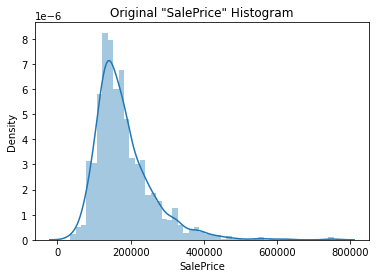

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Original "SalePrice" Histogram')
sns.distplot(DF_OHE['SalePrice'])
plt.show()

* Log Transformed
 - 정규분포 형태 변환

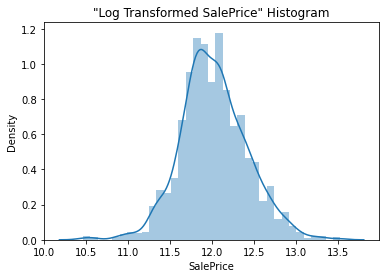

In [13]:
import numpy as np

plt.title('"Log Transformed SalePrice" Histogram')
log_SalePrice = np.log1p(DF_OHE['SalePrice'])
sns.distplot(log_SalePrice)

* 적용

In [14]:
# original_SalePrice = DF_OHE['SalePrice']

DF_OHE['SalePrice'] = np.log1p(DF_OHE['SalePrice'])

* Log 변환

In [15]:
np.log1p(40000)

10.596659732783579

* 복원

In [16]:
np.expm1(np.log1p(40000))

40000.0

In [17]:
DF_OHE.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


> ## 5) train_test_split( )

In [18]:
from sklearn.model_selection import train_test_split

X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
y = DF_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2045)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 270), (1022,), (438, 270), (438,))

In [20]:
X.shape, y.shape

((1460, 270), (1460,))

# II. EDA

In [106]:
DF.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087126,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [ ]:
sns.pairplot(hue='SalePrice', data=DF_OHE)
plt.show()

# III.Modeling

## 1, Lasso

### 모델링

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def lasso(model, dg, ap=0.3):
  # spint
  X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
  y = DF_OHE['SalePrice']
  X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

  # poly
  poly = PolynomialFeatures(degree=dg, include_bias=False)
  PX_tr = poly.fit_transform(X_train)
  PX_te = poly.fit_transform(X_test)

  # modeling
  LS = Lasso(normalize=True, alpha=ap)
  LS.fit(PX_tr, y_train)

  # rmse
  LS_rmse = np.sqrt(mean_squared_error(y_test, LS.predict(PX_te)))  

  return {'model':model, 'degree':dg, 'alpha':ap, 'rmse':LS_rmse}

### Hyperparameter(alpha)

In [22]:
DF_total = pd.DataFrame(columns=['model', 'alpha','degree',  'n_estimators', 'learning_rate', 'max_features', 'max_depth', 'rmse'])

In [23]:
%%time
LS_rmse = pd.DataFrame(columns=['model','degree','alpha','rmse'])


index = 1

alp = [0.05, 0.1, 0.3, 0.7, 0.9]
for i in alp:
    model = 'LS-'+str(index)
    index += 1
    res = lasso(model,dg=1, ap=i)
    print(res)
    LS_rmse = LS_rmse.append(res, ignore_index=True)
    DF_total = DF_total.append(res, ignore_index=True)

{'model': 'LS-1', 'degree': 1, 'alpha': 0.05, 'rmse': 0.3827737290129361}
{'model': 'LS-2', 'degree': 1, 'alpha': 0.1, 'rmse': 0.3827737290129361}
{'model': 'LS-3', 'degree': 1, 'alpha': 0.3, 'rmse': 0.3827737290129361}
{'model': 'LS-4', 'degree': 1, 'alpha': 0.7, 'rmse': 0.3827737290129361}
{'model': 'LS-5', 'degree': 1, 'alpha': 0.9, 'rmse': 0.3827737290129361}
CPU times: user 196 ms, sys: 208 ms, total: 404 ms
Wall time: 224 ms


In [26]:
LS_rmse.sort_values(by='rmse').head(3)

,model,degree,alpha,rmse
0,LS-1,1,0.05,0.382774
1,LS-2,1,0.10,0.382774
2,LS-3,1,0.30,0.382774


## 2, Decision Tree

### 모델링

In [27]:
from sklearn.tree import DecisionTreeRegressor

def decisionTree(model, md):
  # split
  X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
  y = DF_OHE['SalePrice']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

  # modeling
  DT = DecisionTreeRegressor(max_depth=md, criterion='mse')
  DT.fit(X_train, y_train)

  DT_rmse = np.sqrt(mean_squared_error(y_test, DT.predict(X_test)))

  return {'model':model, 'max_depth':md, 'rmse':DT_rmse}

### Hyperparameter(max_depth)

In [28]:
DT_mse = pd.DataFrame(columns=['model','max_depth','rmse'])
a = [30, 50, 80, 100, 300, 500]
index = 1

for i in a:
  model = 'DT-'+str(index)
  index += 1
  res = decisionTree(model, md=i)
  print(res)
  DT_mse = DT_mse.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

{'model': 'DT-1', 'max_depth': 30, 'rmse': 0.2049260779805877}
{'model': 'DT-2', 'max_depth': 50, 'rmse': 0.20809568752363222}
{'model': 'DT-3', 'max_depth': 80, 'rmse': 0.20457905134105486}
{'model': 'DT-4', 'max_depth': 100, 'rmse': 0.2033415218370064}
{'model': 'DT-5', 'max_depth': 300, 'rmse': 0.2034369798987174}
{'model': 'DT-6', 'max_depth': 500, 'rmse': 0.209909258924134}


In [29]:
a = [1000,1500,2000]

for i in a:
  model = 'DT-'+str(index)
  index += 1
  res = decisionTree(model, md=i)
  print(res)
  DT_mse = DT_mse.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

{'model': 'DT-7', 'max_depth': 1000, 'rmse': 0.2058360760570546}
{'model': 'DT-8', 'max_depth': 1500, 'rmse': 0.20061587145694684}
{'model': 'DT-9', 'max_depth': 2000, 'rmse': 0.2080332506924463}


In [30]:
DT_mse.sort_values(by='rmse').head(3)

,model,max_depth,rmse
7,DT-8,1500,0.200616
3,DT-4,100,0.203342
4,DT-5,300,0.203437


## 3, Random Forest

### 모델링

In [104]:
from sklearn.ensemble import RandomForestRegressor

def randomForest(model, n_est, md=None, mf='auto', visualFeatures=False):
  # split
  X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
  y = DF_OHE['SalePrice']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)
  
  # modeling
  RF = RandomForestRegressor(n_estimators=n_est, max_depth=md, max_features=mf, criterion='mse', n_jobs=-1, random_state=2045)
  RF.fit(X_train, y_train)

  # mse
  RF_rmse = np.sqrt(mean_squared_error(y_test, RF.predict(X_test)))

  if visualFeatures:
    plt.figure(figsize=(16,5))
    sns.barplot(X.columns, RF.feature_importances_)
    plt.title('random forest feature importances')
    plt.show()

  return {'model':model, 'n_estimators':n_est, 'max_depth':md, 'max_features':mf, 'rmse':RF_rmse}

### Hyperparameter(n_est/max_depth)

In [32]:
%%time
RF_rmse = pd.DataFrame(columns=['model','n_estimators','max_depth','max_features','rmse'])

est = [300,500,700,1000]
depth = [50, 100, 300, 500]

index = 1
for i in est:
  for j in depth:
    model = 'RF-'+str(index)
    index += 1
    res = randomForest(model, n_est=i, md=j)
    print(res)
    RF_rmse = RF_rmse.append(res, ignore_index=True)
    DF_total = DF_total.append(res, ignore_index=True)

{'model': 'RF-1', 'n_estimators': 300, 'max_depth': 50, 'max_features': 'auto', 'rmse': 0.1403034423266143}
{'model': 'RF-2', 'n_estimators': 300, 'max_depth': 100, 'max_features': 'auto', 'rmse': 0.1403034423266142}
{'model': 'RF-3', 'n_estimators': 300, 'max_depth': 300, 'max_features': 'auto', 'rmse': 0.14030344232661415}
{'model': 'RF-4', 'n_estimators': 300, 'max_depth': 500, 'max_features': 'auto', 'rmse': 0.1403034423266142}
{'model': 'RF-5', 'n_estimators': 500, 'max_depth': 50, 'max_features': 'auto', 'rmse': 0.14005523183610075}
{'model': 'RF-6', 'n_estimators': 500, 'max_depth': 100, 'max_features': 'auto', 'rmse': 0.14005523183610077}
{'model': 'RF-7', 'n_estimators': 500, 'max_depth': 300, 'max_features': 'auto', 'rmse': 0.14005523183610075}
{'model': 'RF-8', 'n_estimators': 500, 'max_depth': 500, 'max_features': 'auto', 'rmse': 0.14005523183610075}
{'model': 'RF-9', 'n_estimators': 700, 'max_depth': 50, 'max_features': 'auto', 'rmse': 0.14006319106051418}
{'model': 'RF-10

In [45]:
RF_rmse.sort_values(by='rmse').head(3)

,model,n_estimators,max_depth,max_features,rmse
19,RF-22,1000,50,18,0.135169
20,RF-23,1000,50,19,0.135767
18,RF-21,1000,50,17,0.136063


### Hyperparameter(max_features)

In [41]:

for i in range(13, 20) :
  model = 'RF-'+str(index)
  index += 1
  res = randomForest(model, n_est=1000, md=50, mf=i)
  print(res)
  RF_rmse = RF_rmse.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

{'model': 'RF-20', 'n_estimators': 1000, 'max_depth': 50, 'max_features': 16, 'rmse': 0.13711950523646263}
{'model': 'RF-21', 'n_estimators': 1000, 'max_depth': 50, 'max_features': 17, 'rmse': 0.13606264634727666}
{'model': 'RF-22', 'n_estimators': 1000, 'max_depth': 50, 'max_features': 18, 'rmse': 0.13516932903589501}
{'model': 'RF-23', 'n_estimators': 1000, 'max_depth': 50, 'max_features': 19, 'rmse': 0.13576659904121197}


In [44]:
RF_rmse.sort_values(by='rmse').head(3)

,model,n_estimators,max_depth,max_features,rmse
19,RF-22,1000,50,18,0.135169
20,RF-23,1000,50,19,0.135767
18,RF-21,1000,50,17,0.136063


## 4, Gradient Boosting

### 모델링

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

def gradient(model,n_est, lr=0.0001, mf='auto', md=None, visualFeatures=False):
  # split
  X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
  y = DF_OHE['SalePrice']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

  # modeling
  GB = GradientBoostingRegressor(loss='ls', n_estimators=n_est, max_features=mf, max_depth=md, learning_rate=lr, criterion='mse')
  GB.fit(X_train, y_train)

  # mse
  GB_rmse = np.sqrt(mean_squared_error(y_test, GB.predict(X_test)))

  if visualFeatures:
    sns.barplot(GB.feature_importances_, X.columns)
    plt.show()

  return {'model':model, 'n_estimators':n_est, 'max_depth':md, 'max_features':mf, 'learning_rate':lr, 'rmse':GB_rmse}

  ### Hyperparameter(n_estimators/ max_depth)

In [49]:
GB_rmse = pd.DataFrame(columns=['model','n_estimators','max_depth','max_features','learning_rate','rmse'])

est = [300,500,700,1000]
depth = [50, 100, 300, 500]

index = 1
for i in est:
  for j in depth:
    model = 'GB-'+str(index)
    index += 1
    res = gradient(model, n_est=i, md=j)
    print(res)
    GB_rmse = GB_rmse.append(res, ignore_index=True)
    DF_total = DF_total.append(res, ignore_index=True)

{'model': 'GB-1', 'n_estimators': 300, 'max_depth': 50, 'max_features': 'auto', 'learning_rate': 0.0001, 'rmse': 0.3731446448544254}
{'model': 'GB-2', 'n_estimators': 300, 'max_depth': 100, 'max_features': 'auto', 'learning_rate': 0.0001, 'rmse': 0.37314521324514455}
{'model': 'GB-3', 'n_estimators': 300, 'max_depth': 300, 'max_features': 'auto', 'learning_rate': 0.0001, 'rmse': 0.3731428751574822}
{'model': 'GB-4', 'n_estimators': 300, 'max_depth': 500, 'max_features': 'auto', 'learning_rate': 0.0001, 'rmse': 0.37315152523847234}
{'model': 'GB-5', 'n_estimators': 500, 'max_depth': 50, 'max_features': 'auto', 'learning_rate': 0.0001, 'rmse': 0.3669401726902179}
{'model': 'GB-6', 'n_estimators': 500, 'max_depth': 100, 'max_features': 'auto', 'learning_rate': 0.0001, 'rmse': 0.366942390737685}
{'model': 'GB-7', 'n_estimators': 500, 'max_depth': 300, 'max_features': 'auto', 'learning_rate': 0.0001, 'rmse': 0.3669158156829348}
{'model': 'GB-8', 'n_estimators': 500, 'max_depth': 500, 'max_f

  ### Hyperparameter(max_features)

In [52]:


for i in range(13,20,2) :
  model = 'GB-'+str(index)
  index += 1
  res = gradient(model, n_est=1000 , mf=i)
  print(res)
  GB_rmse = GB_rmse.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

{'model': 'GB-17', 'n_estimators': 1000, 'max_depth': None, 'max_features': 13, 'learning_rate': 0.0001, 'rmse': 0.3536868979502019}
{'model': 'GB-18', 'n_estimators': 1000, 'max_depth': None, 'max_features': 15, 'learning_rate': 0.0001, 'rmse': 0.3534110245972925}
{'model': 'GB-19', 'n_estimators': 1000, 'max_depth': None, 'max_features': 17, 'learning_rate': 0.0001, 'rmse': 0.35326933981759423}
{'model': 'GB-20', 'n_estimators': 1000, 'max_depth': None, 'max_features': 19, 'learning_rate': 0.0001, 'rmse': 0.35314569652695715}


  ### Hyperparameter(learning_rate)

In [59]:
a = [0.0001, 0.001, 0.01, 0.1]

for i in a:
  model = 'GB-'+str(index)
  index += 1
  res = gradient(model, n_est=1000 , md=100 , lr=i)
  print(res)
  GB_rmse = GB_rmse.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

{'model': 'GB-22', 'n_estimators': 1000, 'max_depth': 100, 'max_features': 'auto', 'learning_rate': 0.0001, 'rmse': 0.35210886239762523}
{'model': 'GB-23', 'n_estimators': 1000, 'max_depth': 100, 'max_features': 'auto', 'learning_rate': 0.001, 'rmse': 0.21329829169592918}
{'model': 'GB-24', 'n_estimators': 1000, 'max_depth': 100, 'max_features': 'auto', 'learning_rate': 0.01, 'rmse': 0.1976452973528095}
{'model': 'GB-25', 'n_estimators': 1000, 'max_depth': 100, 'max_features': 'auto', 'learning_rate': 0.1, 'rmse': 0.19783609630045493}


In [60]:
GB_rmse.sort_values(by='rmse').head(5)

,model,n_estimators,max_depth,max_features,learning_rate,rmse
22,GB-24,1000,100,auto,0.0100,0.197645
23,GB-25,1000,100,auto,0.1000,0.197836
21,GB-23,1000,100,auto,0.0010,0.213298
13,GB-14,1000,100,auto,0.0001,0.352107
20,GB-22,1000,100,auto,0.0001,0.352109


In [61]:
a = [0.3,0.5,0.7,0.9]

for i in a:
  model = 'GB-'+str(index)
  index += 1
  res = gradient(model, n_est=1000 , mf= 4, md=15 , lr=i)
  print(res)
  GB_rmse = GB_rmse.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

{'model': 'GB-26', 'n_estimators': 1000, 'max_depth': 15, 'max_features': 4, 'learning_rate': 0.3, 'rmse': 0.17661203901950911}
{'model': 'GB-27', 'n_estimators': 1000, 'max_depth': 15, 'max_features': 4, 'learning_rate': 0.5, 'rmse': 0.2092194972659817}
{'model': 'GB-28', 'n_estimators': 1000, 'max_depth': 15, 'max_features': 4, 'learning_rate': 0.7, 'rmse': 0.2304693555559411}
{'model': 'GB-29', 'n_estimators': 1000, 'max_depth': 15, 'max_features': 4, 'learning_rate': 0.9, 'rmse': 0.23547396408872737}


In [64]:
GB_rmse.sort_values(by='rmse').head()

,model,n_estimators,max_depth,max_features,learning_rate,rmse
24,GB-26,1000,15,4,0.300,0.176612
22,GB-24,1000,100,auto,0.010,0.197645
23,GB-25,1000,100,auto,0.100,0.197836
25,GB-27,1000,15,4,0.500,0.209219
21,GB-23,1000,100,auto,0.001,0.213298


## 5, LightGBM

### 모델링

In [65]:
from lightgbm import LGBMRegressor

def lightgbm(model, n_est, lr=0.0001, md=None):
  # split
  X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
  y = DF_OHE['SalePrice']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

  # modeling
  LG = LGBMRegressor(linear_tree = True, boosting_type='gbdt', objective ='regression',
                   n_estimators = n_est, learning_rate=lr, max_depth=md, n_jobs=-1)
  LG.fit(X_train, y_train)

  # mse
  LG_rmse = np.sqrt(mean_squared_error(y_test, LG.predict(X_test)))



  return {'model':model, 'n_estimators':n_est, 'max_depth':md, 'learning_rate':lr, 'rmse':LG_rmse}

  ### Hyperparameter(n_estimators/max_depth)

In [66]:
LG_rmse = pd.DataFrame(columns=['model','n_estimators','max_depth','learning_rate','rmse'])

est = [300,500,700,1000]
depth = [50, 100, 300, 500]

index = 1
for i in est:
  for j in depth:
    model = 'LG-'+str(index)
    index += 1
    res = lightgbm(model, n_est=i, md=j)
    print(res)
    LG_rmse = LG_rmse.append(res, ignore_index=True)
    DF_total = DF_total.append(res, ignore_index=True)

{'model': 'LG-1', 'n_estimators': 300, 'max_depth': 50, 'learning_rate': 0.0001, 'rmse': 0.3732225276869415}
{'model': 'LG-2', 'n_estimators': 300, 'max_depth': 100, 'learning_rate': 0.0001, 'rmse': 0.3732225276869415}
{'model': 'LG-3', 'n_estimators': 300, 'max_depth': 300, 'learning_rate': 0.0001, 'rmse': 0.3732225276869415}
{'model': 'LG-4', 'n_estimators': 300, 'max_depth': 500, 'learning_rate': 0.0001, 'rmse': 0.3732225276869415}
{'model': 'LG-5', 'n_estimators': 500, 'max_depth': 50, 'learning_rate': 0.0001, 'rmse': 0.36707638682823135}
{'model': 'LG-6', 'n_estimators': 500, 'max_depth': 100, 'learning_rate': 0.0001, 'rmse': 0.36707638682823135}
{'model': 'LG-7', 'n_estimators': 500, 'max_depth': 300, 'learning_rate': 0.0001, 'rmse': 0.36707638682823135}
{'model': 'LG-8', 'n_estimators': 500, 'max_depth': 500, 'learning_rate': 0.0001, 'rmse': 0.36707638682823135}
{'model': 'LG-9', 'n_estimators': 700, 'max_depth': 50, 'learning_rate': 0.0001, 'rmse': 0.36107103059142026}
{'model'

  ### Hyperparameter(learning_rate)

In [68]:
a = [0.001,0.01,0.1,0.3,0.5, 0.7, 0.9]

for i in a:
  model = 'LG-'+str(index)
  index += 1
  res = lightgbm(model, n_est=1000 , md=50, lr=i)
  print(res)
  LG_rmse = LG_rmse.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

{'model': 'LG-17', 'n_estimators': 1000, 'max_depth': 50, 'learning_rate': 0.001, 'rmse': 0.19774578030467885}
{'model': 'LG-18', 'n_estimators': 1000, 'max_depth': 50, 'learning_rate': 0.01, 'rmse': 0.1345557972935078}
{'model': 'LG-19', 'n_estimators': 1000, 'max_depth': 50, 'learning_rate': 0.1, 'rmse': 0.13732310849784204}
{'model': 'LG-20', 'n_estimators': 1000, 'max_depth': 50, 'learning_rate': 0.3, 'rmse': 0.14373884338835338}
{'model': 'LG-21', 'n_estimators': 1000, 'max_depth': 50, 'learning_rate': 0.5, 'rmse': 0.15338068160265106}
{'model': 'LG-22', 'n_estimators': 1000, 'max_depth': 50, 'learning_rate': 0.7, 'rmse': 0.16772512848792093}
{'model': 'LG-23', 'n_estimators': 1000, 'max_depth': 50, 'learning_rate': 0.9, 'rmse': 0.1952153080963201}


In [69]:
LG_rmse.sort_values(by='rmse').head(5)

,model,n_estimators,max_depth,learning_rate,rmse
17,LG-18,1000,50,0.01,0.134556
18,LG-19,1000,50,0.10,0.137323
19,LG-20,1000,50,0.30,0.143739
20,LG-21,1000,50,0.50,0.153381
21,LG-22,1000,50,0.70,0.167725


# IV. rmse 비교

In [74]:
DF_total_sort = DF_total.sort_values(by='rmse').head(15)
DF_total_sort

,model,alpha,degree,n_estimators,learning_rate,max_features,max_depth,rmse
80,LG-18,NaN,NaN,1000.0,0.01,NaN,50,0.134556
33,RF-22,NaN,NaN,1000.0,NaN,18,50,0.135169
34,RF-23,NaN,NaN,1000.0,NaN,19,50,0.135767
32,RF-21,NaN,NaN,1000.0,NaN,17,50,0.136063
31,RF-20,NaN,NaN,1000.0,NaN,16,50,0.137120
81,LG-19,NaN,NaN,1000.0,0.10,NaN,50,0.137323
30,RF-19,NaN,NaN,1000.0,NaN,13,50,0.138429
28,RF-15,NaN,NaN,1000.0,NaN,auto,300,0.140044
29,RF-16,NaN,NaN,1000.0,NaN,auto,500,0.140044
27,RF-14,NaN,NaN,1000.0,NaN,auto,100,0.140044


<function matplotlib.pyplot.show>

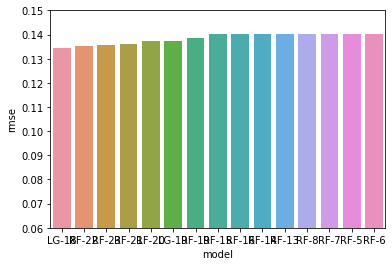

In [78]:
sns.barplot(DF_total_sort.model, DF_total_sort.rmse)
plt.ylim(0.06, 0.15)
plt.show

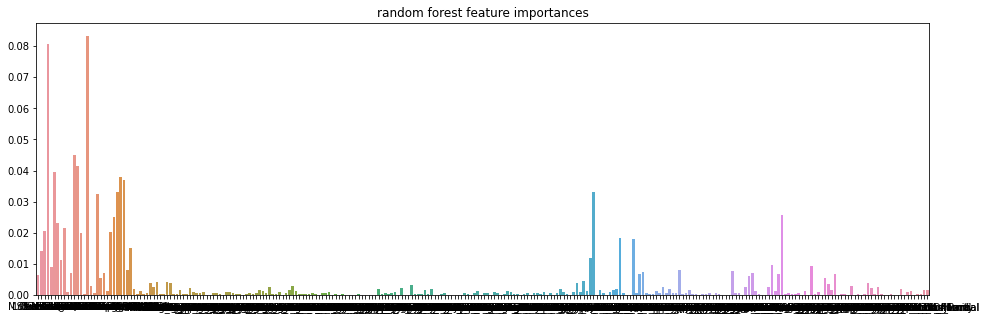

In [105]:
res = randomForest('RF', n_est=1000, md=50, mf=18, visualFeatures=True)
DF_total = DF_total.append(res, ignore_index=True)

# V. storytelling

집 값을 약 0.1의 오차로 예측할 수 있다

# 

# 
# 
# 
# The End
# 
# 
# 